
### https://www.youtube.com/watch?v=PjYS-U0NRWo

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
print(X.shape)

print(np.unique(y, return_counts=True))

(1000, 10)
(array([0, 1]), array([501, 499]))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.84


<center>

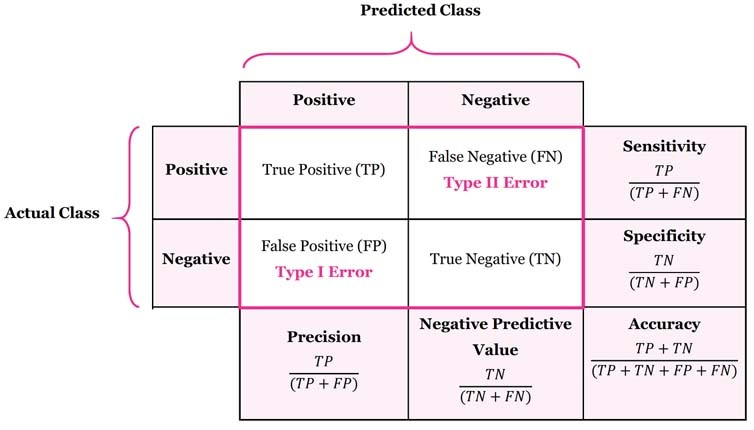

[https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

</center>

In [ ]:
tp = len(y_pred[(y_pred==1) & (y_test == 1)])
fp = len(y_pred[(y_pred==1) & (y_test == 0)])
tn = len(y_pred[(y_pred==0) & (y_test == 0)])
fn = len(y_pred[(y_pred==0) & (y_test == 1)])
print(f'tp: {tp}, fp: {fp}, tn: {tn}, fn: {fn}')
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
accuracy = (tp + tn) / (tp + fn + tn + fp)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'ACC: {accuracy:.2f}')

tp: 112, fp: 15, tn: 98, fn: 25
TPR: 0.82
TNR: 0.87
ACC: 0.84


### Imbalanced Data

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)
print(np.unique(y, return_counts=True))

(array([0, 1]), array([947,  53]))


In [ ]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'tp: {tp}, fp: {fp}, tn: {tn}, fn: {fn}')
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
accuracy = (tp + tn) / (tp + fn + tn + fp)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'ACC: {accuracy:.2f}')

tp: 1, fp: 3, tn: 235, fn: 11
TPR: 0.08
TNR: 0.99
ACC: 0.94


<center>

$\text{Recall = Sensitivity = TPR} $

$\text{Balanced Accuracy} = \dfrac{TNR+TPR}{2} $

$\text{F-Score} = \dfrac{2}{1/\text{Recall}+1/\text{Precession}} =2 \times \dfrac{\text{Precession} \times \text{Recall}}{\text{Precession} + \text{Recall}}$

</center>

In [ ]:
precession = tp / (tp + fp)
recall = tpr
balanced_accuracy = (tpr + tnr) / 2
f1 = (2 * recall * precession) / (recall + precession)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'PRE: {precession:.2f}')
print(f'ACC: {accuracy:.2f}')
print(f' BA: {balanced_accuracy:.2f}')
print(f' F1: {f1:.2f}')

TPR: 0.08
TNR: 0.99
PRE: 0.25
ACC: 0.94
 BA: 0.54
 F1: 0.12


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

classifier = LogisticRegression(random_state=42)
param_grid = [
    {
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [1000, 10000, 100000]
    }
]

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

logisticRegression = grid_search.best_estimator_
y_pred = logisticRegression.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'tp: {tp}, fp: {fp}, tn: {tn}, fn: {fn}')
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precession = tp / (tp + fp)
recall = tpr
accuracy = (tp + tn) / (tp + fn + tn + fp)
balanced_accuracy = (tpr + tnr) / 2
f1 = (2 * recall * precession) / (recall + precession)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'PRE: {precession:.2f}')
print(f'ACC: {accuracy:.2f}')
print(f' BA: {balanced_accuracy:.2f}')
print(f' F1: {f1:.2f}')

Best Hyperparameters: {'C': 0.001, 'max_iter': 1000, 'solver': 'liblinear'}
tp: 4, fp: 11, tn: 227, fn: 8
TPR: 0.33
TNR: 0.95
PRE: 0.27
ACC: 0.92
 BA: 0.64
 F1: 0.30


<center>

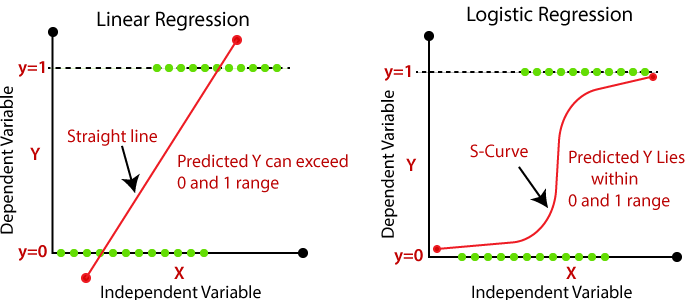

$ Sigmoid(x)=\dfrac{1}{1+e^{-x}} $


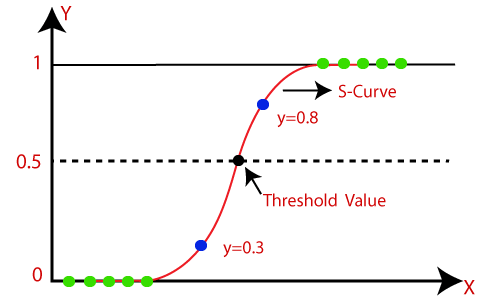

[https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)


</center>

In [ ]:
logisticRegression.predict_proba(X_test)[:10]

array([[0.59327742, 0.40672258],
       [0.62407838, 0.37592162],
       [0.6300924 , 0.3699076 ],
       [0.60290811, 0.39709189],
       [0.66434625, 0.33565375],
       [0.65125309, 0.34874691],
       [0.60763465, 0.39236535],
       [0.51955883, 0.48044117],
       [0.51250917, 0.48749083],
       [0.63090663, 0.36909337]])

In [ ]:
logisticRegression.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
p_pred=logisticRegression.predict_proba(X_test)[:,1]
y_pred = np.where(p_pred < 0.3, 0, 1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'tp: {tp}, fp: {fp}, tn: {tn}, fn: {fn}')
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precession = tp / (tp + fp)
recall = tpr
accuracy = (tp + tn) / (tp + fn + tn + fp)
balanced_accuracy = (tpr + tnr) / 2
f1 = (2 * recall * precession) / (recall + precession)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'PRE: {precession:.2f}')
print(f'ACC: {accuracy:.2f}')
print(f' BA: {balanced_accuracy:.2f}')
print(f' F1: {f1:.2f}')

tp: 12, fp: 202, tn: 36, fn: 0
TPR: 1.00
TNR: 0.15
PRE: 0.06
ACC: 0.19
 BA: 0.58
 F1: 0.11


In [ ]:
p_pred=logisticRegression.predict_proba(X_test)[:,1]
y_pred = np.where(p_pred < 0.4, 0, 1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'tp: {tp}, fp: {fp}, tn: {tn}, fn: {fn}')
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precession = tp / (tp + fp)
recall = tpr
accuracy = (tp + tn) / (tp + fn + tn + fp)
balanced_accuracy = (tpr + tnr) / 2
f1 = (2 * recall * precession) / (recall + precession)
print(f'TPR: {tpr:.2f}')
print(f'TNR: {tnr:.2f}')
print(f'PRE: {precession:.2f}')
print(f'ACC: {accuracy:.2f}')
print(f' BA: {balanced_accuracy:.2f}')
print(f' F1: {f1:.2f}')

tp: 9, fp: 54, tn: 184, fn: 3
TPR: 0.75
TNR: 0.77
PRE: 0.14
ACC: 0.77
 BA: 0.76
 F1: 0.24


In [ ]:
import pandas as pd
p_pred=logisticRegression.predict_proba(X_test)[:,1]
data=[]
for tr in sorted(np.unique(p_pred), reverse=True):
    y_pred = np.where(p_pred < tr, 0, 1)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    precession = tp / (tp + fp)
    recall = tpr
    accuracy = (tp + tn) / (tp + fn + tn + fp)
    balanced_accuracy = (tpr + tnr) / 2
    f1 = (2 * recall * precession) / (recall + precession)
    data.append([tr, tpr, tnr, precession, accuracy, f1, balanced_accuracy])
logisticRegressionData = pd.DataFrame(data, columns = ['Threshold', 'TPR', 'TNR', 'Precession', 'Accuracy', 'F1', 'Balanced Accuracy'])
logisticRegressionData.head()

,Threshold,TPR,TNR,Precession,Accuracy,F1,Balanced Accuracy
0,0.670635,0.083333,1.000000,1.000000,0.956,0.153846,0.541667
1,0.573646,0.083333,0.995798,0.500000,0.952,0.142857,0.539566
2,0.545263,0.083333,0.991597,0.333333,0.948,0.133333,0.537465
3,0.532891,0.083333,0.987395,0.250000,0.944,0.125000,0.535364
4,0.528664,0.166667,0.987395,0.400000,0.948,0.235294,0.577031


In [ ]:
logisticRegressionData.sort_values('Balanced Accuracy', ascending=False).head()

,Threshold,TPR,TNR,Precession,Accuracy,F1,Balanced Accuracy
31,0.438858,0.75,0.903361,0.281250,0.896,0.409091,0.826681
32,0.438334,0.75,0.899160,0.272727,0.892,0.400000,0.824580
33,0.437142,0.75,0.894958,0.264706,0.888,0.391304,0.822479
34,0.427408,0.75,0.890756,0.257143,0.884,0.382979,0.820378
35,0.427135,0.75,0.886555,0.250000,0.880,0.375000,0.818277


In [ ]:
bestThreshold = logisticRegressionData.sort_values('Balanced Accuracy', ascending=False).head(1)
p_pred=logisticRegression.predict_proba(X_test)[:,1]
y_pred = np.where(p_pred < bestThreshold.iloc[0]['Threshold'], 0, 1)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.90


<center>

$\text{FPR} = \dfrac{FP}{TN+FP} = 1 - \dfrac{TN}{TN+FP} = 1 - \text{TNR}$

</center>

In [ ]:
logisticRegressionData['FPR']=1-logisticRegressionData['TNR']

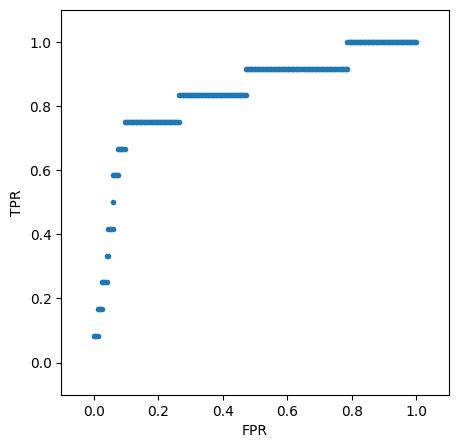

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(logisticRegressionData['FPR'], logisticRegressionData['TPR'], marker='.')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

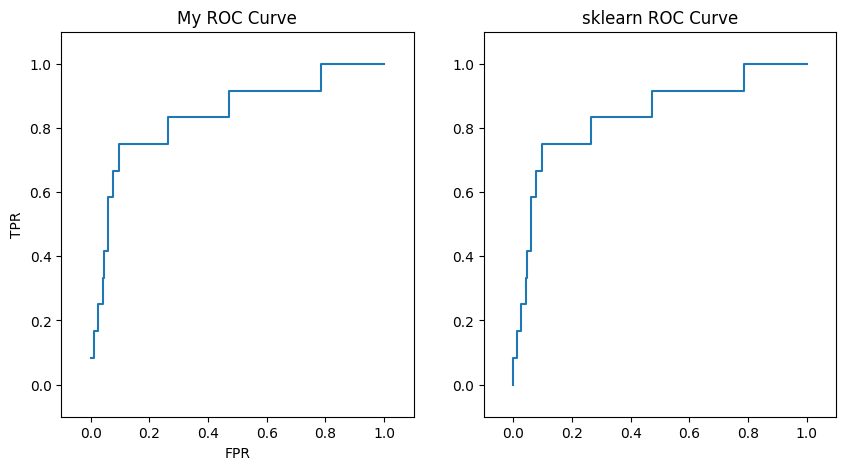

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(logisticRegressionData['FPR'], logisticRegressionData['TPR'])
plt.title('My ROC Curve')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.subplot(1, 2, 2)
p_pred=logisticRegression.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
plt.plot(fpr, tpr)
plt.title('sklearn ROC Curve')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
sklearnData = pd.DataFrame({'Threshold': thresholds, 'TPR': tpr, 'FPR': fpr})
sklearnData['TNR'] = 1 - sklearnData['FPR']
sklearnData['Balanced Accuracy'] = (sklearnData['TPR'] + sklearnData['TNR']) / 2
sklearnData.sort_values('Balanced Accuracy', ascending=False).head(1)

,Threshold,TPR,FPR,TNR,Balanced Accuracy
15,0.438858,0.75,0.096639,0.903361,0.826681


In [ ]:
logisticRegressionData.sort_values('Balanced Accuracy', ascending=False).head(1)

,Threshold,TPR,TNR,Precession,Accuracy,F1,Balanced Accuracy,FPR
31,0.438858,0.75,0.903361,0.28125,0.896,0.409091,0.826681,0.096639


In [ ]:
print(len(thresholds), len(logisticRegressionData))

23 250


https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/metrics/_ranking.py

In [ ]:
_, _, thresholds = roc_curve(y_test,  p_pred, drop_intermediate=False)
print(len(np.unique(thresholds)), logisticRegressionData.Threshold.nunique())

251 250


In [ ]:
print(sum(thresholds[1:] == logisticRegressionData.Threshold))

250


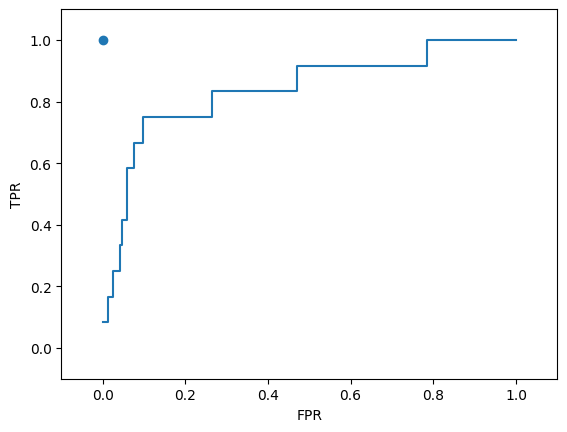

In [ ]:
import matplotlib.pyplot as plt
plt.plot(logisticRegressionData['FPR'], logisticRegressionData['TPR'])
plt.scatter([0], [1], marker='o')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

$ Minimize((1-TPR)+FPR)=Minimize((1-TPR)+(1-TNR))=Minimize(2-(TPR+TNR))=Maximize(TPR+TNR)=Maximize(Balanced\;Accuracy)$

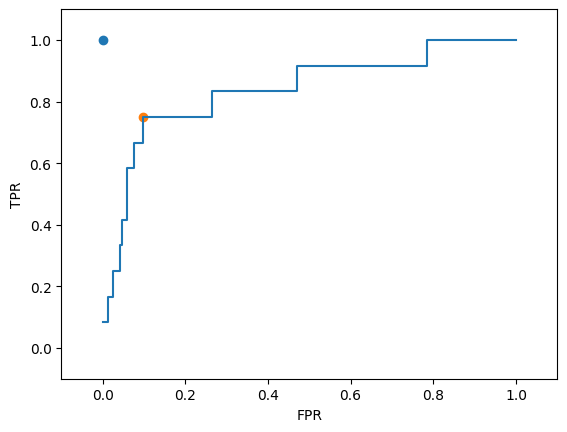

In [ ]:
import matplotlib.pyplot as plt
plt.plot(logisticRegressionData['FPR'], logisticRegressionData['TPR'])
plt.scatter([0], [1], marker='o')
plt.scatter(1-bestThreshold.iloc[0]['TNR'], bestThreshold.iloc[0]['TPR'], marker='o')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

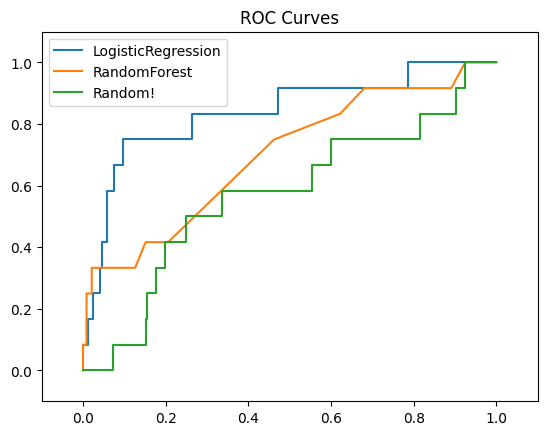

In [ ]:
from sklearn.ensemble import RandomForestClassifier

plt.plot(logisticRegressionData['FPR'], logisticRegressionData['TPR'], label='LogisticRegression')

classifier = RandomForestClassifier(
    n_estimators=5,
    random_state=42,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2)
classifier.fit(X_train, y_train)
p_pred=classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
plt.plot(fpr, tpr, label='RandomForest')

np.random.seed(42)
p_pred = np.random.rand(len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
plt.plot(fpr, tpr, label='Random!')

plt.title('ROC Curves')
plt.xlim((-.1, 1.1))
plt.ylim((-.1, 1.1))
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc

print('LogisticRegression AUC:', auc(logisticRegressionData['FPR'], logisticRegressionData['TPR']))

classifier = RandomForestClassifier(
    n_estimators=5,
    random_state=42,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2)
classifier.fit(X_train, y_train)
p_pred=classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
print('RandomForestClassifier AUC:',auc(fpr, tpr))

np.random.seed(42)
p_pred = np.random.rand(len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
print('Random Model AUC:',auc(fpr, tpr))

LogisticRegression AUC: 0.8385854341736695
RandomForestClassifier AUC: 0.6988795518207283
Random Model AUC: 0.5721288515406162
